In [12]:
# 경고무시
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

In [13]:
# load library
import pandas as pd 
import numpy as np
from sklearn.linear_model import ElasticNet # 엘라스틱넷
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score

In [14]:
# load data
감말랭이 = pd.read_csv("C:/ken/elasticnet/감말랭이_new.csv")
감말랭이.head()

,date,PC1,PC2,감말랭이
0,2018-01-01T00:00:00Z,-3.719474,0.965108,2.862813
1,2018-01-02T00:00:00Z,-3.741912,0.888377,4.328310
2,2018-01-03T00:00:00Z,-4.074829,0.748572,5.545913
3,2018-01-04T00:00:00Z,-4.325838,0.235772,5.867105
4,2018-01-05T00:00:00Z,-3.772842,0.246325,4.414783


In [15]:
# 날짜 컬럼 인덱스로 지정하기. 
감말랭이 = 감말랭이.set_index('date')
감말랭이 = 감말랭이.loc['2018-01-01' : '2019-12-32']

In [16]:
# 스케일링
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

poly = PolynomialFeatures(9)
model = make_pipeline(poly, StandardScaler().fit_transform(감말랭이[['감말랭이']]))

X = 감말랭이[['PC1','PC2']]
y = 감말랭이[['감말랭이']]



C:\Users\CPB06GameN\miniconda3\lib\site-packages\sklearn\pipeline.py:174: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if (estimator is not None and estimator != 'passthrough'


TypeError: Last step of Pipeline should implement fit or be the string 'passthrough'. '[[ 0.34372583]
 [ 1.06020989]
 [ 1.65549814]
 [ 1.81252948]
 [ 1.1024867 ]
 [ 2.63695376]
 [ 1.57430867]
 [ 1.84413649]
 [ 1.29468962]
 [ 1.72065555]
 [ 2.50967699]
 [ 1.54075534]
 [ 2.13485214]
 [ 1.95622064]
 [ 2.24568666]
 [ 2.4130744 ]
 [ 1.10113977]
 [ 0.97285244]
 [ 0.72954999]
 [ 1.11701686]
 [ 0.6131415 ]
 [ 0.48119816]
 [ 1.21765044]
 [ 1.27060192]
 [ 2.21579667]
 [ 1.26097838]
 [ 0.654903  ]
 [ 0.31841832]
 [ 0.7344175 ]
 [ 1.66976283]
 [ 1.25598278]
 [ 0.22037396]
 [ 0.46477546]
 [ 0.89111589]
 [ 0.74667622]
 [ 0.16627014]
 [ 0.41888959]
 [ 0.42352389]
 [ 0.91415343]
 [ 0.65437108]
 [ 1.26781665]
 [-0.02111466]
 [ 0.32801644]
 [ 0.28515638]
 [ 0.59474657]
 [-0.40701606]
 [-0.49076053]
 [-0.28729869]
 [ 0.17316317]
 [ 0.34718921]
 [ 0.33494614]
 [-0.08786833]
 [ 0.05108097]
 [ 0.40752507]
 [-0.42302417]
 [-0.3322361 ]
 [-0.32299243]
 [ 0.33769327]
 [-0.15057536]
 [-0.30618301]
 [-0.4014509 ]
 [-0.33065401]
 [-0.21675652]
 [-0.14445089]
 [-0.1577847 ]
 [-0.07812354]
 [-0.23669638]
 [-0.17275927]
 [-0.18536561]
 [-0.45451874]
 [ 0.61221699]
 [-0.39089062]
 [-0.52841966]
 [-0.31876196]
 [-0.43763696]
 [ 0.07213993]
 [-0.32058508]
 [-0.49343629]
 [-0.47534497]
 [-0.29135022]
 [-0.30084762]
 [-0.51821481]
 [-0.34327892]
 [-0.61304073]
 [-0.34349599]
 [-0.57241397]
 [-0.39468303]
 [-0.61522857]
 [-0.53662294]
 [-0.43920291]
 [-0.75953868]
 [-0.71230294]
 [-0.51123623]
 [-0.71070913]
 [-0.64493277]
 [-0.62707759]
 [-0.5725714 ]
 [-0.4965594 ]
 [-0.73972936]
 [-0.44031565]
 [-0.45510737]
 [-0.62879266]
 [-0.47374333]
 [-0.67546566]
 [-0.66457196]
 [-0.46575712]
 [-0.78036198]
 [-0.34739841]
 [-0.67569105]
 [-0.59422339]
 [-0.8971699 ]
 [-0.38316988]
 [-0.50955392]
 [-0.81627964]
 [-0.80122586]
 [-0.5910382 ]
 [-0.71666835]
 [-0.69626599]
 [-0.7470839 ]
 [-0.72787104]
 [-0.51391052]
 [-0.55978857]
 [-0.67723793]
 [-0.54477636]
 [-0.46029951]
 [-0.62555662]
 [-0.4257014 ]
 [-0.44029658]
 [-0.71545343]
 [-0.52957053]
 [-0.55619661]
 [-0.5485453 ]
 [-0.74403511]
 [-0.59805736]
 [-0.56944243]
 [-0.71760166]
 [-0.75042457]
 [-0.43936523]
 [-0.74036248]
 [-0.6138    ]
 [-0.57767553]
 [-0.38711532]
 [-0.7730661 ]
 [-0.77211372]
 [-0.70449714]
 [-0.54354921]
 [-0.5891129 ]
 [-0.25194474]
 [-0.62130415]
 [-0.48615508]
 [-0.73962326]
 [-0.62669674]
 [-0.67226238]
 [-0.32515044]
 [-0.69236162]
 [-0.55817911]
 [-0.19059343]
 [-0.40351406]
 [-0.74347581]
 [-0.44764722]
 [-0.70068859]
 [-0.8135809 ]
 [-0.87554871]
 [-0.68192797]
 [-0.73837803]
 [-0.71905761]
 [-0.8384836 ]
 [-0.69554633]
 [-0.47532053]
 [-0.73453771]
 [-0.58843186]
 [-0.73815656]
 [-0.78411577]
 [-0.72555756]
 [-0.76030088]
 [-0.91511504]
 [-0.74847727]
 [-0.57023005]
 [-0.82975719]
 [-0.7634054 ]
 [-0.52469863]
 [-0.63851496]
 [-0.5559815 ]
 [-0.40067501]
 [-0.85034729]
 [-0.69008138]
 [-0.78595795]
 [-0.53301143]
 [-0.83063428]
 [-0.64888114]
 [-0.6766845 ]
 [-0.81517619]
 [-0.55402002]
 [-0.75937978]
 [-0.85633194]
 [-0.79099511]
 [-0.83650746]
 [-0.66058252]
 [-0.52334779]
 [-0.88962321]
 [-0.87917245]
 [-0.86444624]
 [-0.61903125]
 [-0.67491858]
 [-0.58729419]
 [-0.87992976]
 [-0.91502264]
 [-0.83772091]
 [-0.68783341]
 [-0.89846109]
 [-0.61470202]
 [-0.90886199]
 [-0.69857018]
 [-0.67839272]
 [-0.39627685]
 [-0.81751509]
 [-0.70989413]
 [-0.79782702]
 [-0.85126349]
 [-1.00980944]
 [-0.99826403]
 [-0.73076632]
 [-0.8379507 ]
 [-0.75289255]
 [-0.90899497]
 [-0.68282706]
 [-0.84615887]
 [-0.77878332]
 [-0.70781385]
 [-0.50458814]
 [-0.76728533]
 [-0.64020705]
 [-0.84347431]
 [-0.67489218]
 [-0.74886204]
 [-0.75721395]
 [-0.65011757]
 [-0.28530397]
 [-0.76492882]
 [-0.81500214]
 [-0.65598977]
 [-0.55861668]
 [-0.59164199]
 [-0.62342158]
 [-0.82286808]
 [-0.64050723]
 [-0.842893  ]
 [-0.89420667]
 [-0.67392709]
 [-0.62945512]
 [-0.75135153]
 [-0.70722521]
 [-0.63739733]
 [-0.44820995]
 [-0.48143865]
 [-0.58245308]
 [-0.62714457]
 [-0.63443312]
 [-0.601311  ]
 [-0.53479689]
 [-0.48185323]
 [-0.41785942]
 [-0.62745209]
 [-0.75531457]
 [-0.90971023]
 [-0.7937178 ]
 [-0.81680912]
 [-0.6704686 ]
 [-0.65278502]
 [-0.38360256]
 [-0.78790525]
 [-0.77690887]
 [-0.60931823]
 [-0.10443917]
 [-0.69619461]
 [-0.36325202]
 [-0.45291123]
 [-0.82781185]
 [-0.36794744]
 [-0.49365581]
 [-0.09872781]
 [-0.24132384]
 [ 0.06782684]
 [ 0.18960835]
 [-0.08040524]
 [ 0.78825731]
 [ 0.91423996]
 [ 0.20045268]
 [ 0.56580115]
 [-0.16669738]
 [ 0.12671408]
 [ 0.92254005]
 [ 0.72105483]
 [ 0.89665857]
 [ 2.10426547]
 [ 1.59038523]
 [ 0.7987467 ]
 [ 0.88680329]
 [ 1.48768213]
 [ 1.12996689]
 [ 2.21280704]
 [ 1.60042434]
 [ 1.02508328]
 [ 1.52402513]
 [ 1.14843857]
 [ 1.18032768]
 [ 1.42624869]
 [ 2.41003587]
 [ 2.93328885]
 [ 3.57163467]
 [ 1.98166113]
 [ 2.42605034]
 [ 3.29864953]
 [ 4.02242214]
 [ 3.28872923]
 [ 2.2197954 ]
 [ 3.00458686]
 [ 2.87906964]
 [ 3.0949623 ]
 [ 2.5828778 ]
 [ 2.12154619]
 [ 4.36094456]
 [ 2.22037915]
 [ 2.74069138]
 [ 2.28194117]
 [ 2.52581759]
 [ 2.76337055]
 [ 1.22445351]
 [ 1.66502928]
 [ 3.28435845]
 [ 2.21505696]
 [ 2.9859421 ]
 [ 2.04320604]
 [ 1.00706334]
 [ 1.8063126 ]
 [ 1.6936711 ]
 [ 1.8798488 ]
 [ 1.91676578]
 [ 0.9733741 ]
 [ 0.98629382]
 [ 1.13897246]
 [ 1.67360364]
 [ 0.74939549]
 [ 1.70010163]
 [ 1.58479513]
 [ 1.71697607]
 [ 0.89771948]
 [ 1.17736591]
 [ 0.56935888]
 [ 1.29886924]
 [ 0.98365863]
 [ 0.95935288]
 [ 2.16042952]
 [ 1.05346647]
 [ 0.65095365]
 [ 0.87925953]
 [ 0.41275729]
 [-0.0320729 ]
 [ 0.05470374]
 [ 0.72999831]
 [ 0.63259588]
 [ 0.67868954]
 [ 1.56720053]
 [ 0.63904645]
 [-0.04673116]
 [ 0.5287859 ]
 [ 0.6076658 ]
 [ 0.65842994]
 [ 0.1085812 ]
 [ 0.71934808]
 [ 0.74125674]
 [ 0.53896337]
 [ 0.32031282]
 [ 0.90983105]
 [ 1.25228522]
 [ 0.23529671]
 [ 0.48275336]
 [ 0.36737646]
 [ 0.82599808]
 [ 0.94158864]
 [ 0.38258423]
 [ 0.11323114]
 [ 0.72792439]
 [-0.109909  ]
 [ 0.37651452]
 [ 0.16633663]
 [ 0.05116213]
 [-0.05539156]
 [ 0.40476913]
 [ 0.54680829]
 [ 0.32091465]
 [ 0.27104521]
 [-0.29552153]
 [ 0.41773871]
 [ 0.51235783]
 [ 0.27825064]
 [-0.39214758]
 [-0.07238921]
 [-0.150591  ]
 [-0.08743027]
 [ 0.20335969]
 [-0.41058554]
 [-0.46200333]
 [ 0.17322379]
 [-0.50972895]
 [ 0.03993841]
 [-0.42181219]
 [-0.35092192]
 [-0.46319674]
 [-0.18826773]
 [ 0.20933065]
 [-0.60969469]
 [-0.0575574 ]
 [-0.25435209]
 [-0.66286911]
 [-0.17711588]
 [-0.29112875]
 [-0.75786321]
 [-0.11068831]
 [-0.02753443]
 [-0.71643759]
 [-0.36042177]
 [-0.62485895]
 [-0.12013242]
 [-0.20640745]
 [-0.62978513]
 [-0.52290143]
 [-0.25776609]
 [-0.42147484]
 [-0.44532787]
 [-0.70852618]
 [-0.10196532]
 [-0.65963698]
 [-0.6714332 ]
 [-0.75681501]
 [-0.43180045]
 [-0.6530109 ]
 [-0.69346165]
 [-0.67680868]
 [-0.728688  ]
 [-0.49420778]
 [-0.54911438]
 [-0.5904388 ]
 [-0.58968541]
 [-0.85974154]
 [-0.77927809]
 [-0.56326124]
 [-0.81155245]
 [-0.48479447]
 [-0.59982816]
 [-0.61941894]
 [-0.47046036]
 [-0.44453927]
 [-0.76182576]
 [-0.6014254 ]
 [-0.65345531]
 [-0.48908556]
 [-0.55787012]
 [-0.68076878]
 [-0.42982969]
 [-0.36744093]
 [-0.5308715 ]
 [-0.59931775]
 [-0.50771516]
 [-0.48611206]
 [-0.45125727]
 [-0.62040017]
 [-0.74448637]
 [-0.63576684]
 [-0.38117858]
 [-0.61612717]
 [-0.90947214]
 [-0.50385968]
 [-0.77893977]
 [-0.5426115 ]
 [-0.51596489]
 [-0.60554538]
 [-0.34848279]
 [-0.55074438]
 [-0.71152315]
 [-0.67002957]
 [-0.38408559]
 [-0.28675161]
 [-0.35382844]
 [-0.5463956 ]
 [-0.7417055 ]
 [-0.80684726]
 [-0.56615163]
 [-0.89649375]
 [-0.8046912 ]
 [-0.79518744]
 [-0.77430058]
 [-0.83487404]
 [-0.60564658]
 [-0.70561624]
 [-0.77667175]
 [-0.83847773]
 [-0.86137887]
 [-0.48115362]
 [-0.67623471]
 [-0.59206636]
 [-0.58378289]
 [-0.64659113]
 [-0.60987656]
 [-0.74820153]
 [-0.67032535]
 [-0.5629767 ]
 [-0.4380535 ]
 [-0.59233819]
 [-0.8309902 ]
 [-0.65621565]
 [-0.7244194 ]
 [-0.74679203]
 [-0.82014881]
 [-0.73027008]
 [-0.6172844 ]
 [-0.59851693]
 [-0.75221493]
 [-0.84698805]
 [-0.61063485]
 [-0.66576585]
 [-0.63118045]
 [-0.84370849]
 [-0.59382494]
 [-0.97948336]
 [-0.65826463]
 [-0.64795516]
 [-0.8395098 ]
 [-0.75603716]
 [-0.66492152]
 [-0.83328364]
 [-0.68023539]
 [-0.78537518]
 [-0.8629282 ]
 [-0.63037181]
 [-0.66598244]
 [-0.23529665]
 [-0.82633048]
 [-0.62164834]
 [-0.71882049]
 [-0.88223444]
 [-0.87791059]
 [-0.76593302]
 [-0.80309836]
 [-0.78647521]
 [-0.65112618]
 [-0.74412507]
 [-0.83273803]
 [-0.92728967]
 [-0.60865626]
 [-0.80681254]
 [-0.68116088]
 [-0.74180474]
 [-0.58778798]
 [-0.49994162]
 [-0.31664111]
 [-0.88570858]
 [-0.55880393]
 [-0.74685461]
 [-0.60946344]
 [-0.77143072]
 [-0.7818722 ]
 [-0.58581086]
 [-0.71192111]
 [-0.53473529]
 [-0.57565246]
 [-0.62975188]
 [-0.55298453]
 [-0.76562306]
 [-0.70956461]
 [-0.66912901]
 [-0.40548678]
 [-0.82798932]
 [-0.63083969]
 [-0.48408311]
 [-0.71506426]
 [-0.91941737]
 [-0.58883765]
 [-0.61854772]
 [-0.74372124]
 [-0.41883233]
 [-0.82328218]
 [-0.70324457]
 [-0.71660479]
 [-0.86635589]
 [-0.77756546]
 [-0.83271456]
 [-0.71207903]
 [-0.68655738]
 [-0.75578391]
 [-0.39759346]
 [-0.50629001]
 [-0.78646396]
 [-0.70887965]
 [-0.74688297]
 [-0.86692497]
 [-0.54955831]
 [-0.56240615]
 [-0.86499772]
 [-0.85369871]
 [-0.90746324]
 [-0.45421268]
 [-0.49362745]
 [-0.50168553]
 [-0.34405138]
 [-0.5783424 ]
 [-0.54182828]
 [-0.38551808]
 [-0.9124559 ]
 [-0.6134871 ]
 [-0.48836932]
 [-0.38713536]
 [-0.68015423]
 [-0.60275277]
 [-0.05047614]
 [-0.52718176]
 [-0.59248877]
 [-0.61948641]
 [-0.4526834 ]
 [-0.80348703]
 [-0.31752602]
 [-0.62831647]
 [-0.89033554]
 [-0.84507351]
 [-0.58350275]
 [-0.72857506]
 [-0.61919356]
 [-0.84242561]
 [-0.64918475]
 [-0.69511805]
 [-0.56398335]
 [-0.6468258 ]
 [-0.88602881]
 [-0.40222629]
 [-0.56625821]
 [-0.66098928]
 [-0.62092672]
 [-0.57947176]
 [-0.55238269]
 [-0.2868489 ]
 [-0.82086456]
 [-0.738071  ]
 [-0.50406649]
 [-0.49089987]
 [-0.36765849]
 [-0.23482046]
 [-0.27080852]
 [-0.42987613]
 [-0.32514115]
 [-0.02197708]
 [-0.06506546]
 [-0.26224834]
 [-0.27415114]
 [-0.31650275]
 [-0.08319149]
 [ 0.19536077]
 [ 0.26628331]
 [ 0.28905097]
 [ 0.36873071]
 [ 0.51497003]
 [ 0.1694216 ]
 [ 0.58876584]
 [ 0.23931744]
 [ 0.60430118]
 [ 0.47512307]
 [ 0.34238282]
 [ 0.85630364]
 [ 0.74837173]
 [ 0.72780803]
 [ 0.62817572]
 [ 0.95081373]
 [ 1.59949982]
 [ 1.77725668]
 [ 1.24118617]
 [ 1.62649014]
 [ 2.16908162]
 [ 1.85435013]
 [ 2.67845272]
 [ 1.53481079]
 [ 2.19435686]
 [ 2.5443015 ]
 [ 1.92237446]
 [ 1.45428622]
 [ 2.11038603]
 [ 1.6522753 ]
 [ 1.79842075]
 [ 1.72675704]
 [ 2.27867237]
 [ 2.65876073]
 [ 2.54538539]
 [ 1.49669699]
 [ 1.88531815]
 [ 2.31071108]
 [ 1.44800433]
 [ 1.83078605]
 [ 1.69471686]
 [ 1.86370429]
 [ 1.50282928]
 [ 3.06828978]
 [ 1.61650823]
 [ 2.16463212]
 [ 2.43305875]
 [ 1.76025561]
 [ 1.99934617]
 [ 2.36648793]
 [ 1.29485585]
 [ 1.38018143]
 [ 1.76432327]
 [ 1.15307287]
 [ 2.12613551]
 [ 1.45100667]
 [ 0.8343671 ]
 [ 1.16339506]
 [ 0.66414276]
 [ 0.77738365]
 [ 1.59441867]
 [ 0.83268577]
 [ 1.19232337]
 [ 0.39512652]
 [ 1.1188297 ]
 [ 0.37464642]
 [ 0.51691488]
 [ 0.20026201]
 [ 0.27285268]
 [ 0.49584126]
 [ 0.9662332 ]
 [ 0.12971593]
 [ 0.15488362]
 [ 0.17401679]
 [-0.16487622]]' (type <class 'numpy.ndarray'>) doesn't

In [6]:
x_train, x_test, y_train, y_test = train_test_split(
                    X, y, test_size = 0.5, shuffle=False, random_state=2021) 
#test_size = 0.5로 하면 트레인, 테스트 반반으로 나뉘는 거니까

In [7]:
x_train.shape, x_test.shape

((365, 2), (365, 2))

In [8]:
alphas = [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1]

for a in alphas:
    model = ElasticNet(alpha=a).fit(X, y)
    score = model.score(X, y)
    pred_y = model.predict(X)
    mse = mean_squared_error(y, pred_y)
    print("Alpha:{0:.4f}, R2:{1:.2f},MSE:{2:.2f}, RMSE:{3:.2f}".format(a, score, mse, np.sqrt(mse)))

Alpha:0.0001, R2:0.38,MSE:2.59, RMSE:1.61
Alpha:0.0010, R2:0.38,MSE:2.59, RMSE:1.61
Alpha:0.0100, R2:0.38,MSE:2.59, RMSE:1.61
Alpha:0.1000, R2:0.38,MSE:2.60, RMSE:1.61
Alpha:0.3000, R2:0.38,MSE:2.60, RMSE:1.61
Alpha:0.5000, R2:0.37,MSE:2.62, RMSE:1.62
Alpha:0.7000, R2:0.37,MSE:2.63, RMSE:1.62
Alpha:1.0000, R2:0.36,MSE:2.67, RMSE:1.63


R2(설명력) 높고 MSE와 RMSE 낮은 alpha = 0.0001, 0.001, 0.01, 0.1

In [9]:
# 애매하기 때문에 cross validation 돌려서 최적의 alpha 출력
from sklearn.linear_model import ElasticNetCV

elasticnet_cv=ElasticNetCV(alphas=alphas, cv=100)
model = elasticnet_cv.fit(x_train, y_train)
print(model.alpha_)

0.1


C:\Users\CPB06GameN\miniconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


alpha값이 0.1로 출력됐음 -> alpha가 0.1일 때, 테스트 세트에 대한 예측 확률이 좋았음

In [10]:
# calculate elasticnet R2, MSE, RMSE from test data
elasticnet=ElasticNet(alpha=0.1).fit(x_train, y_train)
ypred_elasticnet = elasticnet.predict(x_test)
score_elasticnet = elasticnet.score(x_test, y_test)
mse_elasticnet = mean_squared_error(y_test, ypred_elasticnet)
print("Final Result: Elasticnet R2:{0:.3f}, MSE:{1:.2f}, RMSE:{2:.2f}"
.format(score_elasticnet, mse_elasticnet, np.sqrt(mse_elasticnet)))

Final Result: Elasticnet R2:0.271, MSE:2.28, RMSE:1.51


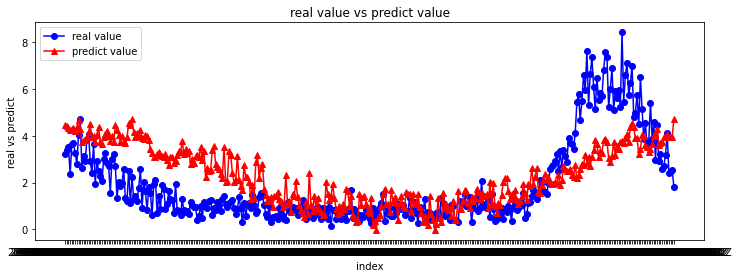

In [11]:
# y_true vs y_pred (시각화해서 비교)

fig = plt.figure( figsize = (12, 4) )
chart = fig.add_subplot(1,1,1)
chart.plot(y_test, marker='o', color='blue', label='real value')
chart.plot(ypred_elasticnet, marker='^', color='red', label='predict value')
chart.set_title('real value vs predict value')
plt.xlabel('index')
plt.ylabel('real vs predict')
plt.legend(loc = 'best') 